In [1]:
import os
import ipywidgets as widgets
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from phaser.utils import load_labelencoders


output_directory = r"./demo_outputs"

# Load labels
label_encoders = load_labelencoders(["le_f", "le_a", "le_t", "le_m"], path=output_directory)
le_f, le_a, le_t, le_m = label_encoders.values()
TRANSFORMS = le_t.classes_
METRICS = le_m.classes_
ALGORITHMS = le_a.classes_

# Read dataframe
df = pd.read_csv(os.path.join(output_directory, "distances.csv.bz2"))

# Split into intra and inter for stats
intra_df = df[df["class"] == 1]
inter_df = df[df["class"] == 0]

# Create a label encoder for the class labels
le_c = LabelEncoder()
le_c.classes_ = np.array(["Inter (0)", "Intra (1)"])


interactive(children=(Dropdown(description='Transform', options=('Border_bw30_bc255.255.255', 'Crop_fixed[10, …

['PDQ' 'Wavehash' 'pHash'] ['Cosine' 'Hamming'] ['Border_bw30_bc255.255.255' 'Crop_fixed[10, 10, 10, 10]'
 'Flip_Horizontal' 'Rescale_fixed(96, 96)' 'Watermark' 'orig']


interactive(children=(Dropdown(description='Transform', options=('Border_bw30_bc255.255.255', 'Crop_fixed[10, …

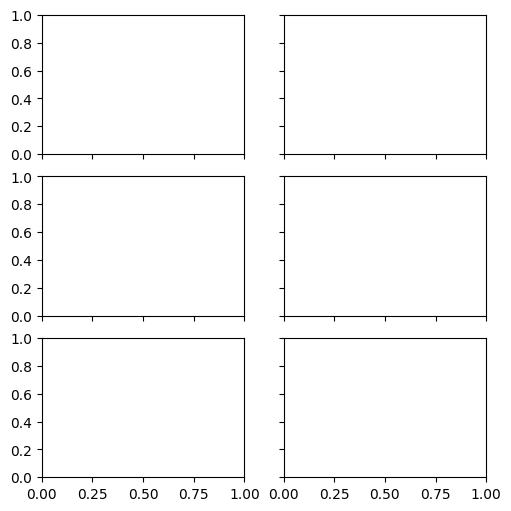

In [2]:
from phaser.evaluation import macro_stats
from phaser.plotting import histogram_fig, kde_distributions_ax
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, VBox
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# macro_tables = []
# for transform in TRANSFORMS[:-1]:
#     stats = macro_stats(
#         data=intra_df, le_a=le_a, le_m=le_m, transform=transform, style=False
#     )
#     macro_tables.append(str(stats))



def plot_image(transform, mode):
    data = df
    if transform != 'Select':
        if mode == "inter":
            fig = histogram_fig(inter_df, le_a, le_m, transform, interactive=True)
        elif mode == "intra":
            fig = histogram_fig(intra_df, le_a, le_m, transform, interactive=True)

#define widgets
tselect = widgets.Dropdown(
        options=TRANSFORMS[:-1],
        description='Transform'
    )
mselect = widgets.Dropdown(
        options=METRICS,
        description='Metric'
    )
aselect = widgets.Dropdown(
        options=ALGORITHMS,
        description='Algorithm'
    )
modeselect = widgets.Dropdown(
        options=["inter", "intra"],
        description='Comparison Mode'
    )

# #interact function in isolation
h = interactive(plot_image, transform=tselect, mode=modeselect)
display(h)

#print(df)

### KDE multi
def kde_plot_multi(transform):
    if transform != 'Select':

        #t_label = le_a.transform(np.array(transform).ravel()
        n_cols = len(METRICS)
        n_rows = len(ALGORITHMS)
        # Subset data
        fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(5,5), constrained_layout=True, 
                                 sharex=True, sharey=True)
                                 
        for col_i, metric in enumerate(METRICS):
            for row_i, algo in enumerate(ALGORITHMS):
                    # Transform strings to labels
                    m_label = le_m.transform(np.array(metric).ravel())
                    a_label = le_a.transform(np.array(algo).ravel())

                    # Subset data and get the distances for the chosen transformation
                    _X = df.query(f"algo=={a_label} and metric == {m_label}")
                    axes[col_i, row_i] = kde_distributions_ax(_X, transform, le_c, fill=True, title=f"{algo} - {metric} - {transform}", ax=axes
)

### KDE Single
def kde_plot(metric, algorithm, transform):
    if transform != 'Select':


        m_label = le_m.transform(np.array(metric).ravel())
        a_label = le_a.transform(np.array(algorithm).ravel())
        #t_label = le_a.transform(np.array(transform).ravel())


        # Subset data
        data = df.query(f"algo == {a_label} and metric == {m_label}").copy()
        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(4,3), constrained_layout=True)
        ax = kde_distributions_ax(data, transform, le_c, fill=True, title=f"{algorithm} - {metric} - {transform}", ax=ax
)        

print(ALGORITHMS, METRICS,TRANSFORMS)

#kde_plot(metric="Hamming", algorithm="pHash", transform="Flip_Horizontal")

#k = interactive(kde_plot, metric=mselect, algorithm=aselect, transform=tselect)

k = interactive(kde_plot_multi, transform=tselect)
display(k)
